In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import re

In [3]:
file3 = "../arabidopsis_sim_data/sim_20/sim_20_results.csv"
df1 = pd.read_csv(file3,sep=",")

begin=21
end=300
for i in range(begin,end):
    file3 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_" + str(i) + "_results.csv"
    df2 = pd.read_csv(file3,sep=",")
    df1 = pd.concat([df1, df2], axis=0)

df1.reset_index().drop("index",axis=1)

,id,coverage,k-length,metric,score
0,20,10,10.0,BC,0.267049
1,20,10,10.0,BF,0.142970
2,20,10,10.0,CS,0.148497
3,20,30,10.0,BC,0.209258
4,20,30,10.0,BF,0.105875
...,...,...,...,...,...
6712,299,10,40.0,BF,0.464762
6713,299,10,40.0,CS,0.493370
6714,299,30,40.0,BC,0.521064
6715,299,30,40.0,BF,0.410979


In [4]:
info_file = "../arabidopsis_sim_data/sim_20/sim_info_20.csv"
info = pd.read_csv(info_file,sep=",")

begin=21
end=300
for i in range(begin,end):
    info_file2 = "../arabidopsis_sim_data/sim_" + str(i) + "/sim_info_" + str(i) + ".csv"
    df2 = pd.read_csv(info_file2,sep=",")
    info = pd.concat([info, df2], axis=0)

info.reset_index().drop("index",axis=1)
info

,id,pop,pop_size,generations,sampled individuals,mutation rate,coverage,k-length,average pi
0,20,0,100,1000,10,0.000050,10,10,0.016987
0,21,0,100,1000,10,0.000001,10,10,0.000384
0,22,0,100,1000,10,0.000001,10,10,0.000375
0,23,0,100,1000,10,0.000010,10,10,0.004172
0,24,0,100,1000,10,0.000030,10,10,0.019200
...,...,...,...,...,...,...,...,...,...
0,295,0,100,1000,10,0.000050,10,10,0.013319
0,296,0,100,1000,10,0.000100,10,10,0.055968
0,297,0,100,1000,10,0.000001,10,10,0.000347
0,298,0,100,1000,10,0.000010,10,10,0.001973


In [5]:
df = pd.merge(df1,info,on='id').drop(["coverage_y","k-length_y"],axis=1).rename(columns={"coverage_x":"coverage", "k-length_x":"k-length"})

In [6]:
# df = df[df[df['average pi'] < 0.001]['score'] > 0.4]
# df[df[df['average pi'] < 0.001]["score"] > .4]

In [7]:
BC = df[df['metric']=='BC']
BF = df[df['metric']=='BF']
CS = df[df['metric']=='CS']
BC

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi
0,20,10,10.0,BC,0.267049,0,100,1000,10,0.00005,0.016987
3,20,30,10.0,BC,0.209258,0,100,1000,10,0.00005,0.016987
6,20,10,20.0,BC,0.408423,0,100,1000,10,0.00005,0.016987
9,20,30,20.0,BC,0.348096,0,100,1000,10,0.00005,0.016987
12,20,10,30.0,BC,0.486189,0,100,1000,10,0.00005,0.016987
...,...,...,...,...,...,...,...,...,...,...,...
6702,299,30,20.0,BC,0.352924,0,100,1000,10,0.00003,0.013754
6705,299,10,30.0,BC,0.500664,0,100,1000,10,0.00003,0.013754
6708,299,30,30.0,BC,0.445188,0,100,1000,10,0.00003,0.013754
6711,299,10,40.0,BC,0.572166,0,100,1000,10,0.00003,0.013754


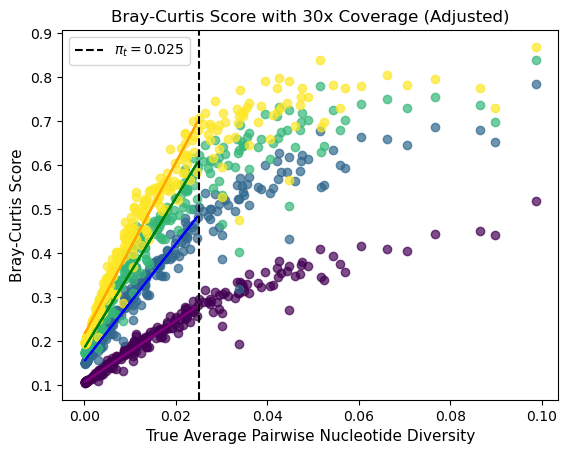

In [8]:
plot_df = BC[BC["coverage"]==30]; ADJUSTED = False

fig, ax = plt.subplots()

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))
color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    plt.scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    plt.plot(X, reg.predict(X), color=color_1[i])

if(not ADJUSTED):
    plt.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

plt.title("Bray-Curtis Score with 30x Coverage (Adjusted)")
plt.ylabel("Bray-Curtis Score", fontsize=11, color="black")
plt.xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    plt.xlim(0,0.025)
else:
    plt.legend()

plt.show()

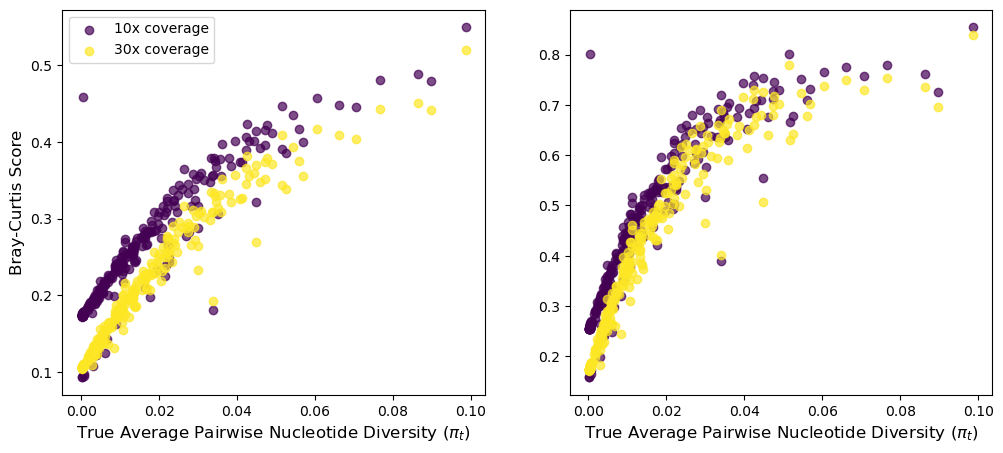

In [27]:
k=10
plot_df = BC[BC["k-length"]==k]; ADJUSTED = False

fig, ax = plt.subplots(1,2,figsize=(12, 5))

num_cov = 2

c=[10,30]

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_cov))
color_1 = ["purple","orange"]
labels = ["10x coverage","30x coverage"]

for i in range(0,num_cov):
    kmer_data = plot_df[plot_df['coverage']== c[i]]

    ax[0].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=labels[i],alpha=0.7)

ax[0].set_ylabel("Bray-Curtis Score", fontsize=12, color="black")
ax[0].set_xlabel(r"True Average Pairwise Nucleotide Diversity ($\pi_{t}$)", fontsize=12,color='black')
ax[0].legend()

k=30
plot_df = BC[BC["k-length"]==k]

for i in range(0,num_cov):
    kmer_data = plot_df[plot_df['coverage']== c[i]]

    ax[1].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

ax[1].set_xlabel(r"True Average Pairwise Nucleotide Diversity ($\pi_{t}$)", fontsize=12,color='black')
plt.show()

30x Cov, 40-mer: R^2: 0.9470437790771866
30x Cov, 30-mer: R^2: 0.9586040073888035
30x Cov, 20-mer: R^2: 0.9672611731362968
30x Cov, 10-mer: R^2: 0.9721594600105349


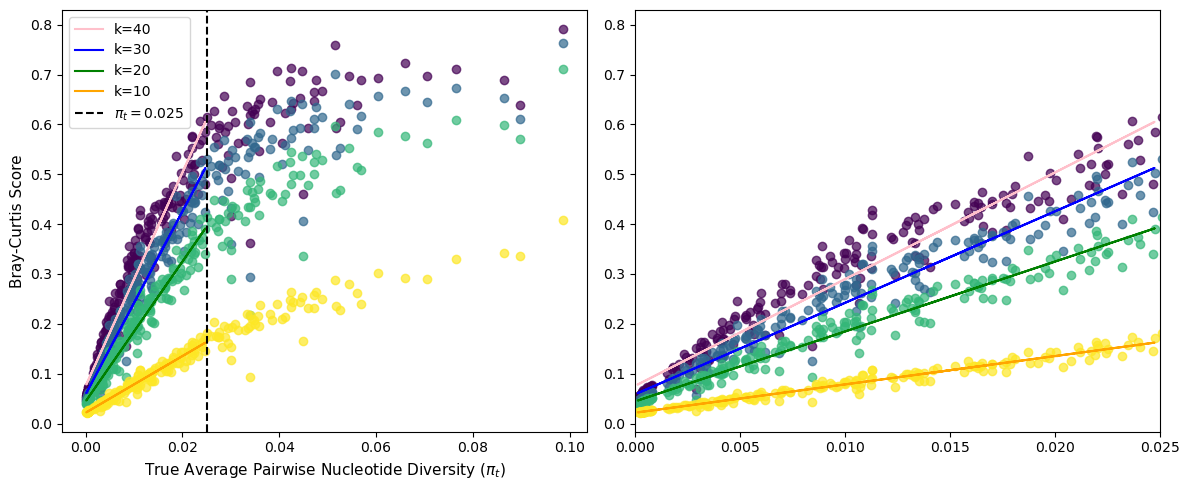

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [10]:
ADJUSTED=False
plot_df = BF[BF["coverage"]==30]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

color_1 = ["Pink","Blue","Green","Orange"]
kmers = {40: 'orange', 30: 'green',  20: 'blue', 10: 'purple'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    axs[0].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[0].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k))

if(not ADJUSTED):
    axs[0].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[0].set_title("Bray-Curtis Score with 30x Coverage")
axs[0].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
axs[0].set_xlabel(r"True Average Pairwise Nucleotide Diversity ($\pi_t$)", fontsize=11,color='black')

if(ADJUSTED):
    axs[0].set_xlim(0,0.025)
else:
    axs[0].legend()

# Second plot
ADJUSTED=True
# num_kmers = 4

# k=[10,20,30,40]

# print("")

# viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_kmers))
# color_1 = ["purple","blue","green","orange"]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    axs[1].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[1].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k))
    print("30x Cov, " + str(k) + "-mer: R^2: " + str(r2_score(y,reg.predict(X))))

if(not ADJUSTED):
    axs[1].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[1].set_title("Bray-Curtis Score with 30x Coverage (Adjusted)")
# axs[1].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
# axs[1].set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    axs[1].set_xlim(0,0.025)
else:
    axs[1].legend()

if(not ADJUSTED):
    axs[1].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[0].set_title("Bray-Curtis Score with 30x Coverage")
# axs[0].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
# axs[0].set_xlabel(r"True Average Pairwise Nucleotide Diversity ($\pi_t$)", fontsize=11,color='black')

# fig.tight_layout()
# fig.savefig("../figures/BrayCurtis30x.eps",format='eps',dpi=350)

fig.tight_layout()
plt.show()
fig.savefig("../figures/bray_curtis_30x.eps",format='eps',dpi=350)


30x Cov, 10-mer: R^2: 0.9721594600105349
30x Cov, 20-mer: R^2: 0.9672611731362968
30x Cov, 30-mer: R^2: 0.9586040073888035
30x Cov, 40-mer: R^2: 0.9470437790771866

10x Cov, 10-mer: R^2: 0.676956468175222
10x Cov, 20-mer: R^2: 0.789032423490563
10x Cov, 30-mer: R^2: 0.8275713440874771
10x Cov, 40-mer: R^2: 0.8410202518405505


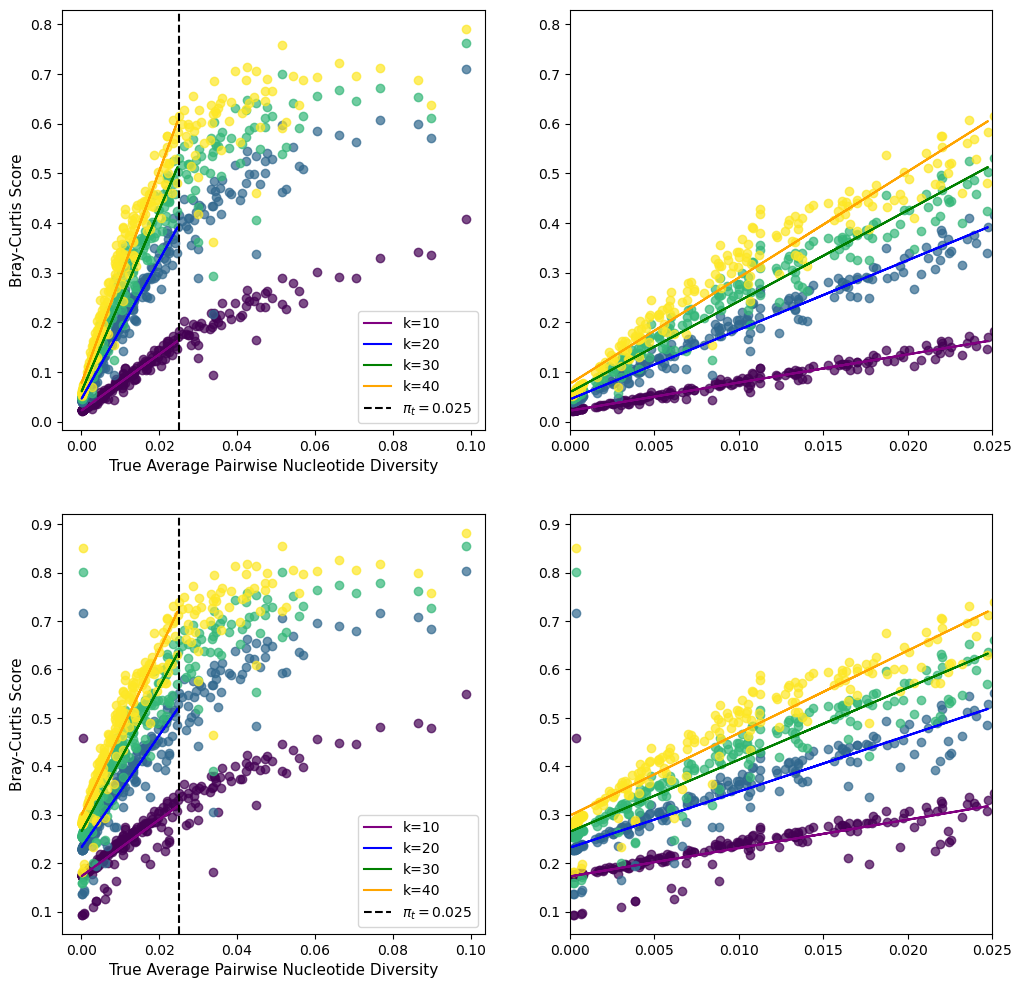

In [11]:
ADJUSTED=False
plot_df = BF[BF["coverage"]==30]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, len(kmers)))

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    axs[0,0].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[0,0].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k))

if(not ADJUSTED):
    axs[0,0].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[0].set_title("Bray-Curtis Score with 30x Coverage")
axs[0,0].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
axs[0,0].set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    axs[0,0].set_xlim(0,0.025)
else:
    axs[0,0].legend()

# Second plot
ADJUSTED=True
num_kmers = 4

k=[10,20,30,40]

print("")

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_kmers))
color_1 = ["purple","blue","green","orange"]

for i in range(0,num_kmers):
    kmer_data = plot_df[plot_df['k-length']== k[i]]

    axs[0,1].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[0,1].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k[i]))
    print("30x Cov, " + str(k[i]) + "-mer: R^2: " + str(r2_score(y,reg.predict(X))))

if(not ADJUSTED):
    axs[0,1].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[1].set_title("Bray-Curtis Score with 30x Coverage (Adjusted)")
# axs[1].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
# axs[1].set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    axs[0,1].set_xlim(0,0.025)
else:
    axs[0,1].legend()

# 10x COVERAGE
    
print("")
    
ADJUSTED=False
plot_df = BC[BC["coverage"]==10]

for i, (k, co) in enumerate(kmers.items()):
    kmer_data = plot_df[plot_df['k-length']== k]

    axs[1,0].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[1,0].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k))
    print("10x Cov, " + str(k) + "-mer: R^2: " + str(r2_score(y,reg.predict(X))))

if(not ADJUSTED):
    axs[1,0].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

# axs[0].set_title("Bray-Curtis Score with 30x Coverage")
axs[1,0].set_ylabel("Bray-Curtis Score", fontsize=11, color="black")
axs[1,0].set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')

if(ADJUSTED):
    axs[1,0].set_xlim(0,0.025)
else:
    axs[1,0].legend()

# Second plot
ADJUSTED=True
num_kmers = 4

k=[10,20,30,40]

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_kmers))
color_1 = ["purple","blue","green","orange"]

for i in range(0,num_kmers):
    kmer_data = plot_df[plot_df['k-length']== k[i]]

    axs[1,1].scatter(kmer_data["average pi"],kmer_data["score"],color=viridis_colors[i],label=None,alpha=0.7)

    x = np.array(kmer_data['average pi']).reshape(-1, 1)
    sub_df2 = kmer_data[kmer_data["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    axs[1,1].plot(X, reg.predict(X), color=color_1[i],label="k=" + str(k[i]))

if(not ADJUSTED):
    axs[1,1].axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

if(ADJUSTED):
    axs[1,1].set_xlim(0,0.025)
else:
    axs[1,1].legend()

# fig.tight_layout()
# fig.savefig("../figures/BrayCurtis30x.eps",format='eps',dpi=350)

# plt.tight_layout()
# plt.show()
# plt.savefig("../figures/BrayCurtis30x.pdf",format='pdf',dpi=350)

[array([0.267004, 0.004874, 0.329415, 1.      ])
 array([0.190631, 0.407061, 0.556089, 1.      ])
 array([0.993248, 0.906157, 0.143936, 1.      ])]
Score: Bray-Curtis Slope: 6.957947868070643R^2: 0.9707301762668581
Score: Cosine Similarity Slope: 5.924955674031504R^2: 0.972133357842995
Score: Counting Bloom Filter Slope: 5.679917426453096R^2: 0.9721594600105349


C:\Users\localmgr\AppData\Local\Temp\ipykernel_21228\2643682585.py:59: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


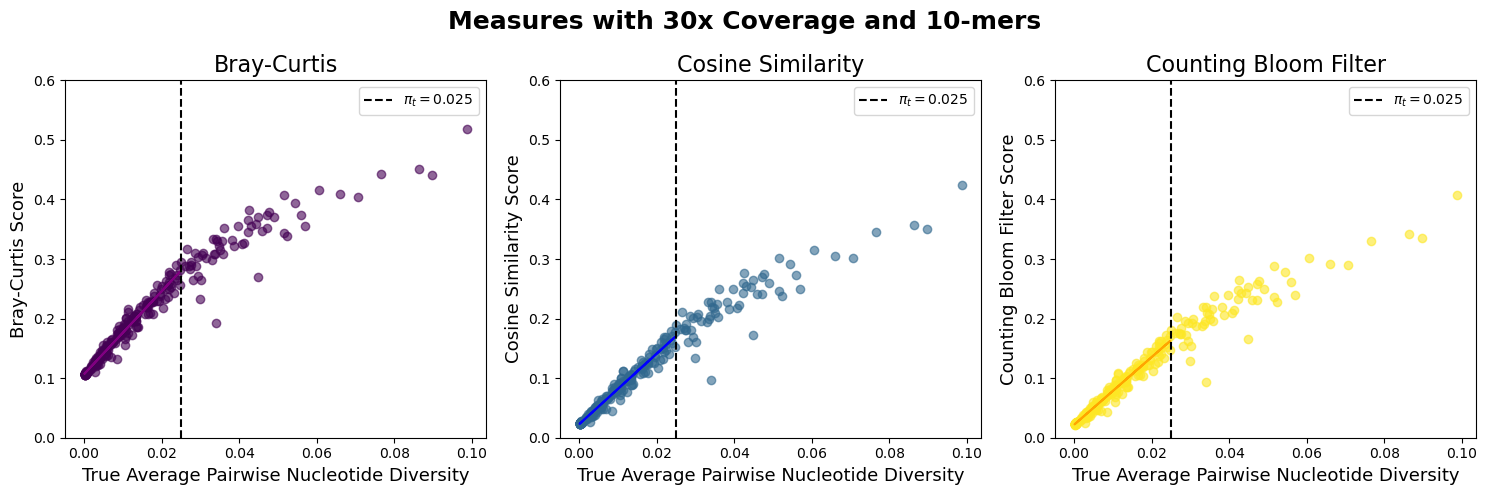

In [12]:
coverage = 30
k_len = 10

df1 = BC[BC["coverage"]==coverage]
df1 = df1[df1["k-length"]==k_len]
df2 = CS[CS["coverage"]==coverage]
df2 = df2[df2["k-length"]==k_len]
df3 = BF[BF["coverage"]==coverage]
df3 = df3[df3["k-length"]==k_len]

num_plots = 4

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple","blue","orange"]
score = ["Bray-Curtis","Cosine Similarity", "Counting Bloom Filter"]

colors = np.array([0,0,0], dtype=object)
colors[0] = viridis_colors[0]
colors[1] = viridis_colors[1]
colors[2] = viridis_colors[3]

print(colors)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each subplot
for i, df in enumerate([df1, df2, df3]):
    ax = axes[i]
    ax.scatter(df["average pi"],df["score"],color=colors[i],label=None,alpha=0.6)

    x = np.array(df['average pi']).reshape(-1, 1)
    sub_df2 = df[df["average pi"]<=.025]

    X = np.array(sub_df2['average pi']).reshape(-1, 1)
    y = np.array(sub_df2['score'])
    reg = LinearRegression().fit(X, y)

    # Calculate R^2 value
    r2 = r2_score(y, reg.predict(X))
    # Get slope
    slope = reg.coef_[0]

    print("Score: " + score[i] + " Slope: " + str(slope) + "R^2: " + str(r2))

    ax.plot(X, reg.predict(X), color=color_1[i])
    ax.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

    ax.set_title(score[i] + "",fontsize=16)
    ax.set_xlabel("True Average Pairwise Nucleotide Diversity",fontsize=13)
    ax.set_ylabel(score[i] + " Score",fontsize=13)
    ax.set_ylim(0, 0.6)
    ax.legend()

# Share y-axis among subplots
fig.suptitle("Measures with " + str(coverage) + "x Coverage and " + str(k_len) + "-mers",fontsize=18, fontweight='bold')
fig.tight_layout()
# plt.legend()
fig.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


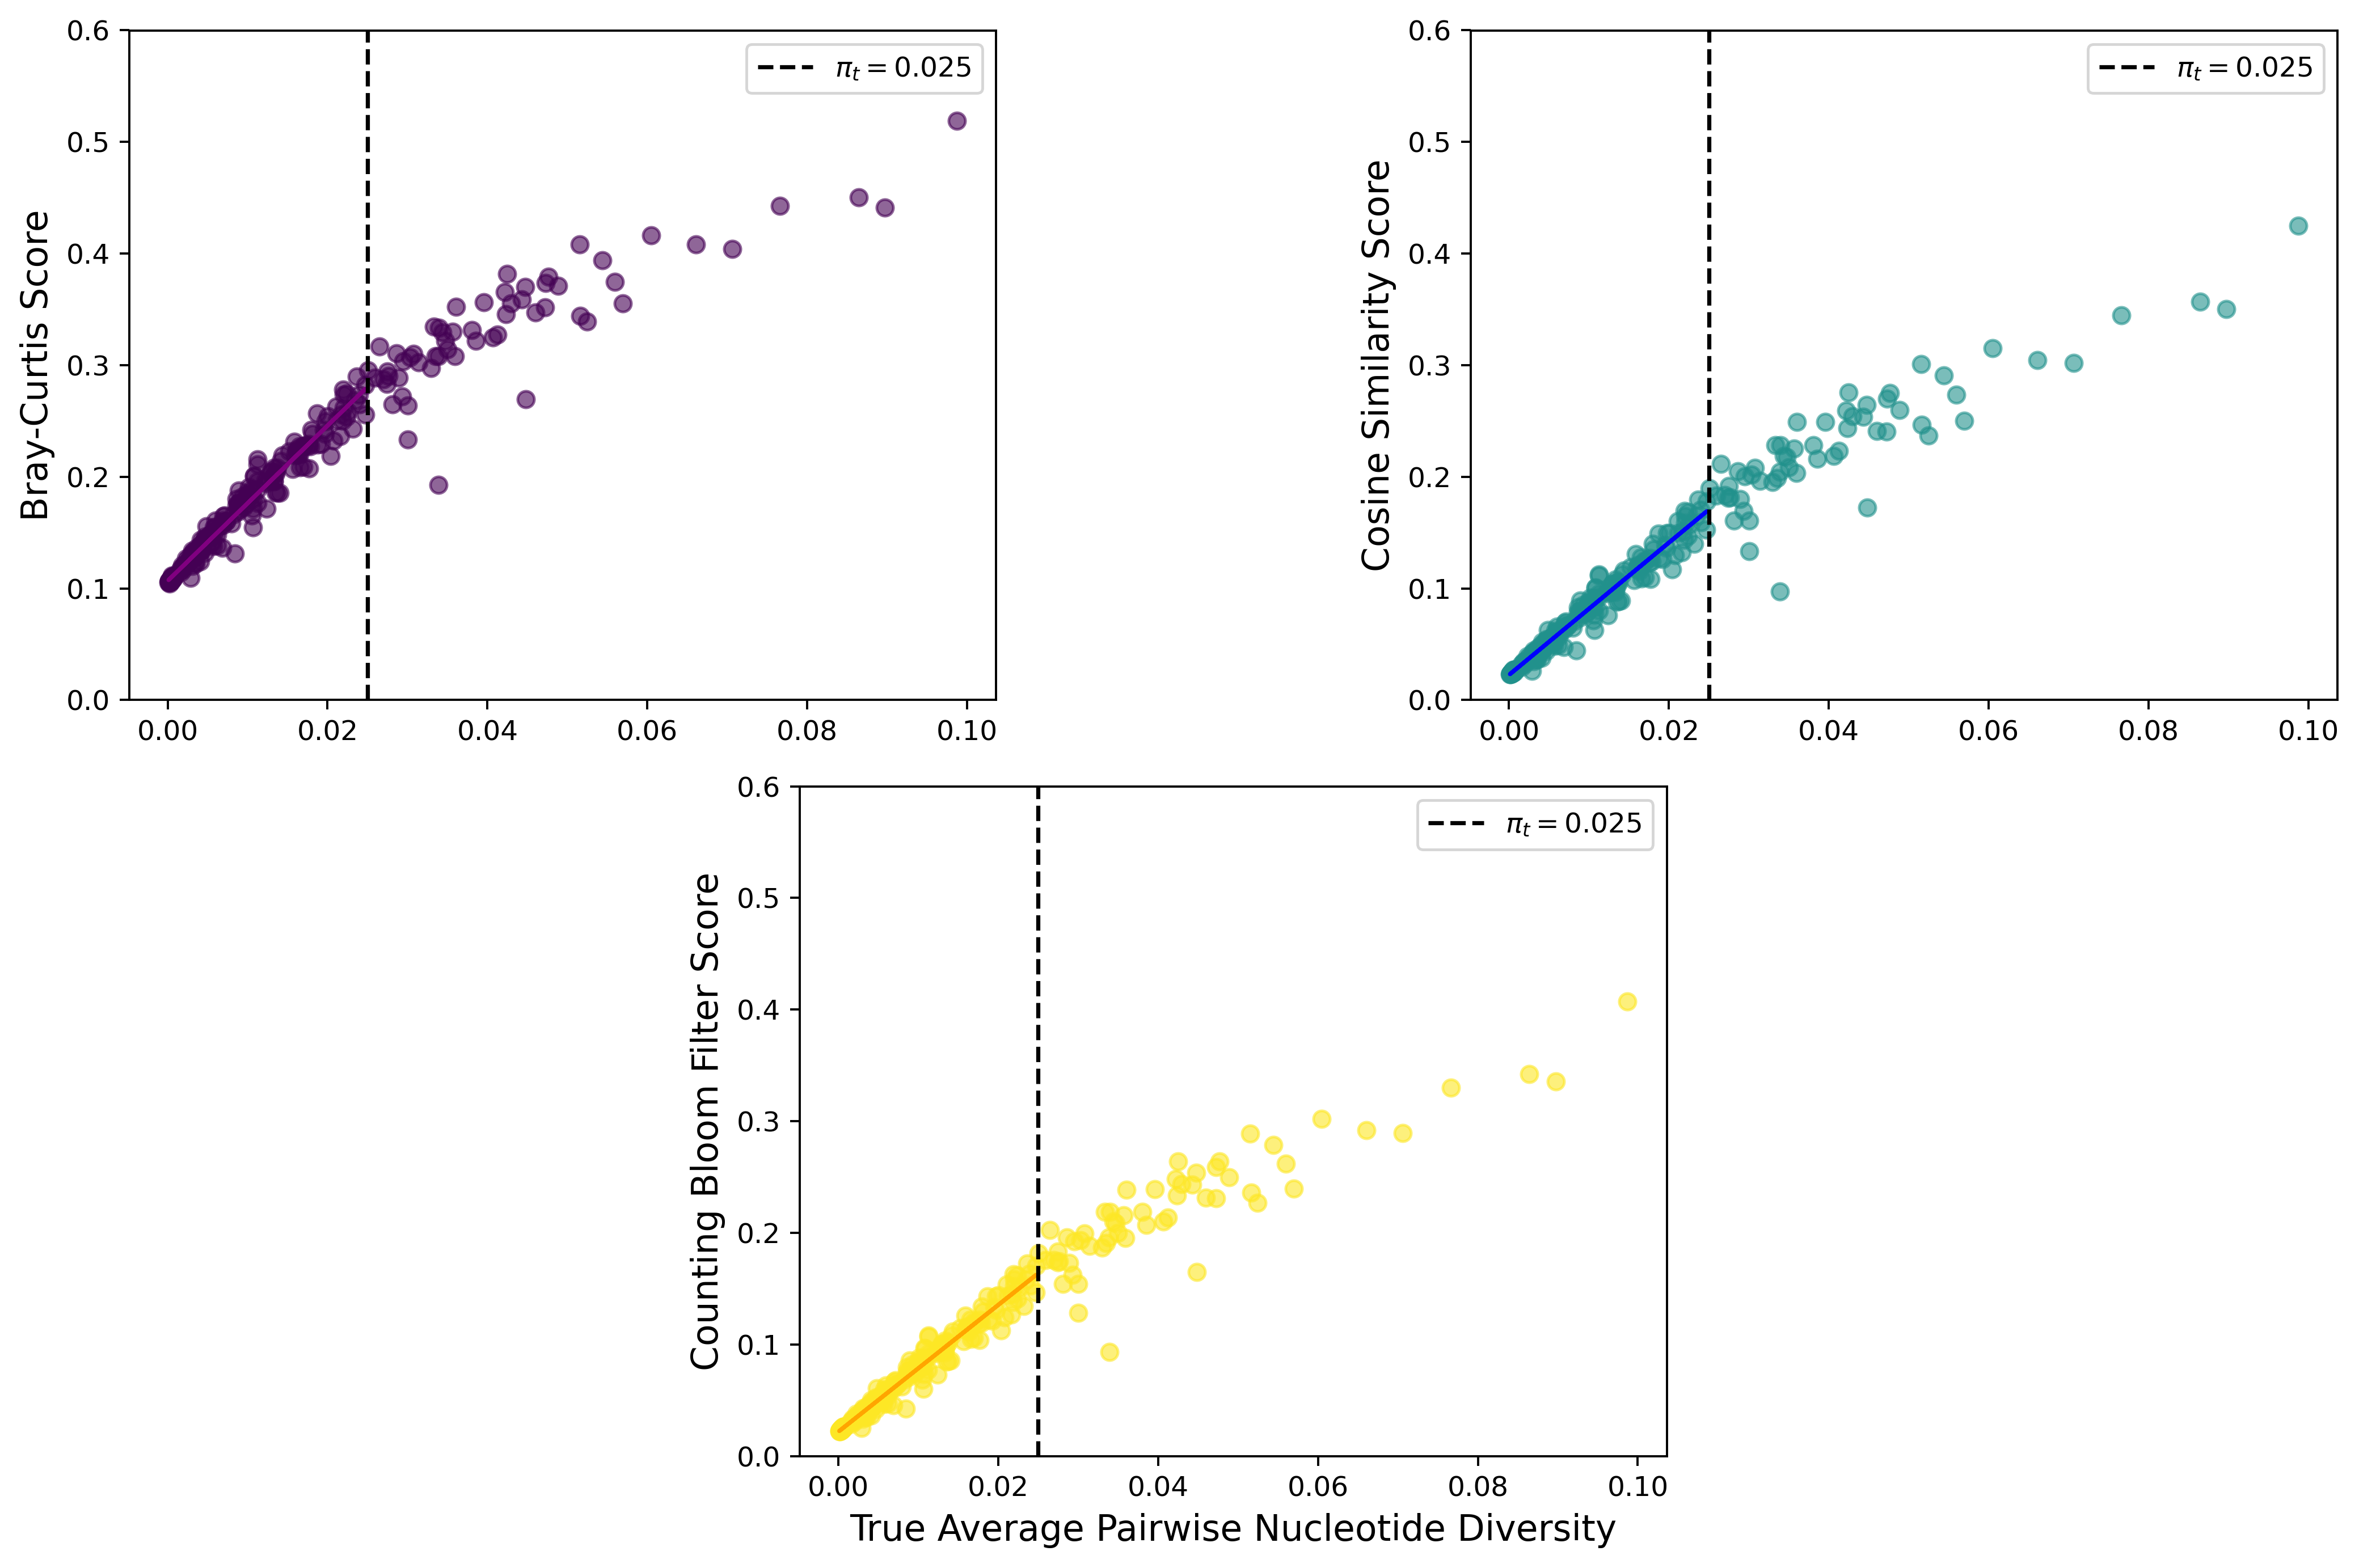

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming BC, CS, and BF DataFrames are defined somewhere in your code

coverage = 30
k_len = 10

df1 = BC[(BC["coverage"] == coverage) & (BC["k-length"] == k_len)]
df2 = CS[(CS["coverage"] == coverage) & (CS["k-length"] == k_len)]
df3 = BF[(BF["coverage"] == coverage) & (BF["k-length"] == k_len)]

num_plots = 3

viridis_colors = plt.cm.viridis(np.linspace(0, 1, num_plots))
color_1 = ["purple", "blue", "orange"]
score = ["Bray-Curtis", "Cosine Similarity", "Counting Bloom Filter"]

colors = [viridis_colors[0], viridis_colors[1], viridis_colors[2]]

# Create subplots
fig = plt.figure(figsize=(12, 8),dpi=350)
gs = fig.add_gridspec(2,7)

# First subplot
ax1 = fig.add_subplot(gs[0,0:-4])
ax1.scatter(df1["average pi"], df1["score"], color=colors[0], label=None, alpha=0.6)

x = np.array(df1['average pi']).reshape(-1, 1)
sub_df2 = df1[df1["average pi"] <= 0.025]

X = np.array(sub_df2['average pi']).reshape(-1, 1)
y = np.array(sub_df2['score'])
reg = LinearRegression().fit(X, y)

ax1.plot(X, reg.predict(X), color=color_1[0])
ax1.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

# ax1.set_title(score[0], fontsize=16)
# ax1.set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=13)
ax1.set_ylabel(score[0] + " Score", fontsize=13)
ax1.set_ylim(0, 0.6)
ax1.legend()

# Second subplot
ax2 = fig.add_subplot(gs[0,4:])
ax2.scatter(df2["average pi"], df2["score"], color=colors[1], label=None, alpha=0.6)

x = np.array(df2['average pi']).reshape(-1, 1)
sub_df2 = df2[df2["average pi"] <= 0.025]

X = np.array(sub_df2['average pi']).reshape(-1, 1)
y = np.array(sub_df2['score'])
reg = LinearRegression().fit(X, y)

ax2.plot(X, reg.predict(X), color=color_1[1])
ax2.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

# ax2.set_title(score[1], fontsize=16)
# ax2.set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=13)
ax2.set_ylabel(score[1] + " Score", fontsize=13)
ax2.set_ylim(0, 0.6)
ax2.legend()

# Third subplot
ax3 = fig.add_subplot(gs[1,2:-2])
ax3.scatter(df3["average pi"], df3["score"], color=colors[2], label=None, alpha=0.6)

x = np.array(df3['average pi']).reshape(-1, 1)
sub_df2 = df3[df3["average pi"] <= 0.025]

X = np.array(sub_df2['average pi']).reshape(-1, 1)
y = np.array(sub_df2['score'])
reg = LinearRegression().fit(X, y)

ax3.plot(X, reg.predict(X), color=color_1[2])
ax3.axvline(x=0.025, linestyle='--', color='black', label=r'$\pi_{t} = 0.025$')

# ax3.set_title(score[2], fontsize=16)
ax3.set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=13)
ax3.set_ylabel(score[2] + " Score", fontsize=13)
ax3.set_ylim(0, 0.6)
ax3.legend()

fig.tight_layout()
fig.savefig("../figures/all_scores_30x.eps",format='eps',dpi=350)


In [14]:
df['pi_t']=df['average pi']
df

,id,coverage,k-length,metric,score,pop,pop_size,generations,sampled individuals,mutation rate,average pi,pi_t
4,20,30,10.0,BF,0.105875,0,100,1000,10,0.000050,0.016987,0.016987
28,21,30,10.0,BF,0.023503,0,100,1000,10,0.000001,0.000384,0.000384
52,22,30,10.0,BF,0.023702,0,100,1000,10,0.000001,0.000375,0.000375
76,23,30,10.0,BF,0.044489,0,100,1000,10,0.000010,0.004172,0.004172
100,24,30,10.0,BF,0.121263,0,100,1000,10,0.000030,0.019200,0.019200
...,...,...,...,...,...,...,...,...,...,...,...,...
6601,295,30,10.0,BF,0.103485,0,100,1000,10,0.000050,0.013319,0.013319
6625,296,30,10.0,BF,0.261996,0,100,1000,10,0.000100,0.055968,0.055968
6649,297,30,10.0,BF,0.023673,0,100,1000,10,0.000001,0.000347,0.000347
6673,298,30,10.0,BF,0.030894,0,100,1000,10,0.000010,0.001973,0.001973


In [15]:
aligned_df = pd.read_csv('../kmer_review_pi_values.txt', sep="\t", header=0)
aligned_df

,h,w,ntotal,nvariant,ninvariant,pi,thetaw,d,sim
0,110.203864,109.479657,3148,465,2683,0.035008,0.034778,0.009392,s100x10P0
1,109.898464,109.329351,3148,465,2683,0.034911,0.034730,0.007425,s100x30P0
2,270.260871,213.404713,3589,906,2683,0.075303,0.059461,0.381278,s101x10P0
3,274.088687,216.246247,3602,919,2683,0.076093,0.060035,0.382367,s101x30P0
4,1.066667,2.115883,2692,9,2683,0.000396,0.000786,-0.707992,s102x10P0
...,...,...,...,...,...,...,...,...,...
204,2.143791,3.198090,2694,11,2683,0.000796,0.001187,-0.621455,s202x10P0
205,13.712421,24.235458,2786,103,2683,0.004922,0.008699,-0.620616,s98x10P0
206,13.671795,23.980009,2785,102,2683,0.004909,0.008610,-0.613746,s98x30P0
207,30.735684,60.271134,2939,256,2683,0.010458,0.020507,-0.700911,s99x10P0


In [16]:
aligned_ids = []    
for values in aligned_df['sim']:
    aligned_ids.append(int(re.search(r'\d+', values).group()))

In [17]:
new_column = []    
for values in aligned_df['sim']:
    new_column.append(re.search(r'[\D]*[\d]+[\D]+([\d]+)', values).group())

aligned_covs = []    
for values in new_column:
    aligned_covs.append(int(re.search(r'\d+$', values).group()))

In [18]:
aligned_df['id']=aligned_ids
aligned_df['coverage']=aligned_covs
aligned_df

,h,w,ntotal,nvariant,ninvariant,pi,thetaw,d,sim,id,coverage
0,110.203864,109.479657,3148,465,2683,0.035008,0.034778,0.009392,s100x10P0,100,10
1,109.898464,109.329351,3148,465,2683,0.034911,0.034730,0.007425,s100x30P0,100,30
2,270.260871,213.404713,3589,906,2683,0.075303,0.059461,0.381278,s101x10P0,101,10
3,274.088687,216.246247,3602,919,2683,0.076093,0.060035,0.382367,s101x30P0,101,30
4,1.066667,2.115883,2692,9,2683,0.000396,0.000786,-0.707992,s102x10P0,102,10
...,...,...,...,...,...,...,...,...,...,...,...
204,2.143791,3.198090,2694,11,2683,0.000796,0.001187,-0.621455,s202x10P0,202,10
205,13.712421,24.235458,2786,103,2683,0.004922,0.008699,-0.620616,s98x10P0,98,10
206,13.671795,23.980009,2785,102,2683,0.004909,0.008610,-0.613746,s98x30P0,98,30
207,30.735684,60.271134,2939,256,2683,0.010458,0.020507,-0.700911,s99x10P0,99,10


In [19]:
aligned_df = pd.merge(aligned_df,info,on='id').drop(["coverage_y"],axis=1).rename(columns={"coverage_x":"coverage"})
aligned_df

,h,w,ntotal,nvariant,ninvariant,pi,thetaw,d,sim,id,coverage,pop,pop_size,generations,sampled individuals,mutation rate,k-length,average pi
0,110.203864,109.479657,3148,465,2683,0.035008,0.034778,0.009392,s100x10P0,100,10,0,100,1000,10,0.000050,10,0.023187
1,109.898464,109.329351,3148,465,2683,0.034911,0.034730,0.007425,s100x30P0,100,30,0,100,1000,10,0.000050,10,0.023187
2,270.260871,213.404713,3589,906,2683,0.075303,0.059461,0.381278,s101x10P0,101,10,0,100,1000,10,0.000100,10,0.076610
3,274.088687,216.246247,3602,919,2683,0.076093,0.060035,0.382367,s101x30P0,101,30,0,100,1000,10,0.000100,10,0.076610
4,1.066667,2.115883,2692,9,2683,0.000396,0.000786,-0.707992,s102x10P0,102,10,0,100,1000,10,0.000001,10,0.000431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,2.143791,3.198090,2694,11,2683,0.000796,0.001187,-0.621455,s202x10P0,202,10,0,100,1000,10,0.000001,10,0.000350
205,13.712421,24.235458,2786,103,2683,0.004922,0.008699,-0.620616,s98x10P0,98,10,0,100,1000,10,0.000010,10,0.002536
206,13.671795,23.980009,2785,102,2683,0.004909,0.008610,-0.613746,s98x30P0,98,30,0,100,1000,10,0.000010,10,0.002536
207,30.735684,60.271134,2939,256,2683,0.010458,0.020507,-0.700911,s99x10P0,99,10,0,100,1000,10,0.000030,10,0.007146


Slope: 1.4082844012362519	R^2: 0.969710052705719


Text(0.5, 0, 'True Average Pairwise Nucleotide Diversity')

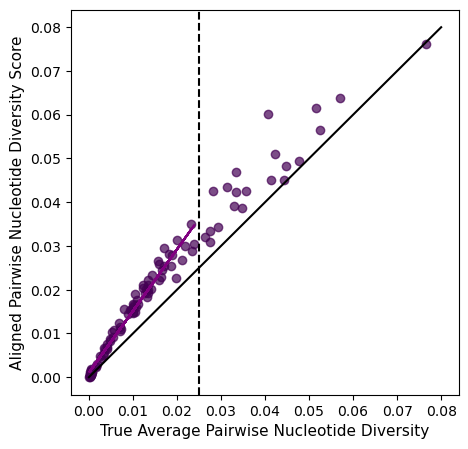

In [20]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))

color_1 = ["Purple","Blue","Green","Orange"]
kmers = {10: 'purple', 20: 'blue', 30: 'green', 40: 'orange'}
viridis_colors = plt.cm.viridis(np.linspace(0, 1, 2))

# aligned_cov10 = aligned_df[aligned_df['coverage']==10]
# axs.scatter(aligned_cov10["average pi"],aligned_cov10["pi"],color=viridis_colors[0],label='x10 coverage',alpha=0.7)

aligned_cov = aligned_df[aligned_df['coverage']==30]
axs.scatter(aligned_cov["average pi"],aligned_cov["pi"],color=viridis_colors[0],label='x30 coverage',alpha=0.7)

x = np.array(aligned_cov['pi']).reshape(-1, 1)
sub_df2 = aligned_cov[aligned_cov["average pi"]<=.025]
# sub_df2 = aligned_cov30

X = np.array(sub_df2['average pi']).reshape(-1, 1)
y = np.array(sub_df2['pi'])
reg = LinearRegression().fit(X, y)

# Calculate R^2 value
r2 = r2_score(y, reg.predict(X))
# Get slope
slope = reg.coef_[0]

print("Slope: " + str(slope) + "\tR^2: " + str(r2))


axs.plot(X, reg.predict(X), color=color_1[0])

axs.axvline(x=0.025, linestyle='--', color='black',label=r'$\pi_{t} = 0.025$')

x=[0,.08]
y=[0,.08]

plt.plot(x,y,"-k",label=r'score$=\pi_{t}$')

# axs[0].set_title("Bray-Curtis Score with 30x Coverage")
axs.set_ylabel("Aligned Pairwise Nucleotide Diversity Score", fontsize=11, color="black")
axs.set_xlabel("True Average Pairwise Nucleotide Diversity", fontsize=11,color='black')



# fig.tight_layout()
# fig.savefig("../figures/BrayCurtis30x.eps",format='eps',dpi=350)

In [21]:
aligned_df[(aligned_df["average pi"] < 0.025) & (aligned_df["pi"] > 0.02) & (aligned_df["pi"] > aligned_df["average pi"] + .01)]

,h,w,ntotal,nvariant,ninvariant,pi,thetaw,d,sim,id,coverage,pop,pop_size,generations,sampled individuals,mutation rate,k-length,average pi
0,110.203864,109.479657,3148,465,2683,0.035008,0.034778,0.009392,s100x10P0,100,10,0,100,1000,10,0.00005,10,0.023187
1,109.898464,109.329351,3148,465,2683,0.034911,0.034730,0.007425,s100x30P0,100,30,0,100,1000,10,0.00005,10,0.023187
30,82.660868,105.504710,3131,448,2683,0.026401,0.033697,-0.309931,s115x10P0,115,10,0,100,1000,10,0.00005,10,0.015644
31,83.238339,106.282273,3135,452,2683,0.026551,0.033902,-0.309638,s115x30P0,115,30,0,100,1000,10,0.00005,10,0.015644
38,87.979144,69.675333,2979,296,2683,0.029533,0.023389,0.375677,s119x10P0,119,10,0,100,1000,10,0.00003,10,0.016998
39,87.953846,69.598518,2979,296,2683,0.029525,0.023363,0.376553,s119x30P0,119,30,0,100,1000,10,0.00003,10,0.016998
41,84.252856,133.334357,3250,567,2683,0.025924,0.041026,-0.525688,s120x30P0,120,30,0,100,1000,10,0.00005,10,0.015866
78,94.307226,77.409086,3012,329,2683,0.031311,0.025700,0.312007,s139x10P0,139,10,0,100,1000,10,0.00003,10,0.020041
79,94.615385,77.820387,3014,331,2683,0.031392,0.025820,0.308136,s139x30P0,139,30,0,100,1000,10,0.00003,10,0.020041
201,88.977619,112.899217,3163,480,2683,0.028131,0.035694,-0.302701,s200x30P0,200,30,0,100,1000,10,0.00005,10,0.018090


In [22]:
file_path = '../arabidopsis_data/low_repeat_region.txt'
 
with open(file_path, 'r') as file:
    ref_seq = file.read()

ref_seq = ref_seq.replace("\n", "")

print(ref_seq)

ATCTCCTTGTGCAGTTCTTCGGCCTCTCGAAGCTTTCCCTCTTTCACAAAACTATCAATCAAAACACTGAATGTGACAACGTTGGGGTTGATTTTCCTCTTGATCATATCCCTCAATAACTTGGCACCATCATCCCATCTACCAGCATTACAAAAGCCGCCAATGAGAATGTTGTAGGTAATAATATTTGTTGTGATCCCTTTCATTTCCATTTCATTGAAAAGGTTGAATGCATTGTCGAGGCTCCCGTGTTTGCAAAGACCATCAATGATGATACTGTATTTGACTGCATCGAGCTTGATATTTCTTTCTTCCATCTTTCTGAGCAACTCCATGGCAAGGGCAGTTTGGCCGGACTTACACATTACATTTAAAACCGGTCCGTAGGTAACTGCATTGGGTTGACAGCCATATTCCACCATTTTATCTATCAAAAGCATTGCTTCAGCCTCTTTACCGCTGAGACAAAGTCCATTGACCAGAGTGTTAATAGTTATGAGATCGGGTTTATGTCCCATTTCAACCATTCGATCAACTAATTCCAGAGCTTCGGAAACTCTACCCTCGAGACATAATCCGTTGATTAAAGTTGAAAATGTGATAGTGTTAGGCTCATACCCAAGTTTAATGATCTTCCCCATAGCAGAAAAAGCCAAACAGAGTTTACGACATCGACAAAAGCAATTAATCATAATACTCAGAGTGTAGAGGTTATGCGCGATTCCCTTTAATTCCATTTGCTTGCAGAGAGCTAACACAAGATCATACTGTTTCGTTTTGGCAATGGCACTAAACAATCTACTGAAATCTATAACAGTGGGAAGAGGACGAGAGTGAATCATGTCTCGGAACAGATCAATAGCATCATCTGCCTTAATATCGACAAGCCCACTTCTCAATCTCTCTCTATAAGACAGATTTCTATCGCTGAAAGCAGAGAAGCCGCGTTCGCAGCAAAAAGATAGCTCATTTGGGCAATTAATCAAAGCAATTCTCAGAG

In [23]:
def difference_lookup(id, indv, hap):
    n = indv*2 + hap

    file_path = '../arabidopsis_sim_data/sim_' + str(id) +'/split_fastas/n' + str(n) + '.fa'

    with open(file_path,'r') as file:
        next(file)
        sample = file.read()

    sample = sample.replace("\n", "")

    path = "../SNP_Positions/ID" + str(id) + "_P0_I" + str(indv) + "_H" + str(hap) + '.txt'
    difference_out = ''

    for i in range(len(ref_seq)):
        if (ref_seq[i] != sample[i]):
            difference_out = difference_out + '\n' + str(i + 418500)

    difference_out = difference_out[1:]

    with open(path,'w') as file:
        file.write(difference_out)

In [24]:
ids = [100,115,119,120,139,200]

for id in ids:
    for indv in range(0,10):
        for hap in range(0,2):
            difference_lookup(id, indv, hap)